In [10]:
import pandas as pd
import numpy as np
import matplotlib
import scipy
import matplotlib.pyplot as plt

In [4]:
# read the train data
train_df = pd.read_csv('./exoTrain.csv')
train_df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [5]:
# extracting features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,5087.0,1.007273,0.084982,1.00,1.000,1.00,1.000,2.0
FLUX.1,5087.0,144.505445,21506.686590,-227856.26,-42.340,-0.71,48.255,1439240.5
FLUX.2,5087.0,128.577834,21797.167583,-315440.76,-39.520,-0.89,44.285,1453319.0
FLUX.3,5087.0,147.134789,21913.092010,-284001.76,-38.505,-0.74,42.325,1468429.0
FLUX.4,5087.0,156.151203,22233.659938,-234006.87,-35.050,-0.40,39.765,1495750.0
...,...,...,...,...,...,...,...,...
FLUX.3193,5087.0,655.303147,53399.785963,-502889.37,-24.405,3.50,30.855,3616292.0
FLUX.3194,5087.0,-494.784966,17844.469520,-775322.00,-26.760,-0.68,18.175,288607.5
FLUX.3195,5087.0,-544.594264,17722.339334,-732006.00,-24.065,0.36,18.770,215972.0
FLUX.3196,5087.0,-440.239100,16273.406292,-700992.00,-21.135,0.90,19.465,207590.0


In [6]:
exoplanets = []
for i in range(len(train_df)):
    if train_df['LABEL'][i] == 2:
        exoplanets += [train_df.iloc[i,1:]]
print(len(exoplanets))

37


In [7]:
no_exoplanets = []
for i in range(len(train_df)):
    if train_df['LABEL'][i] == 1:
        no_exoplanets += [train_df.iloc[i,1:]]
print(len(no_exoplanets))

5050


In [59]:
no_exo_stats = scipy.stats.describe(no_exoplanets)
print('mean_no_exoplanet:',     int(np.mean(no_exo_stats.mean)))
print('max mean_no_exoplanet:', int(np.max(no_exo_stats.mean)))
print('min mean_no_exoplanet:', int(np.min(no_exo_stats.mean)))

print()

exo_stats = scipy.stats.describe(exoplanets)
print('mean_exoplanet:',        int(np.mean(exo_stats.mean)))
print('max mean_exoplanet:',    int(np.max(exo_stats.mean)))
print('min mean_exoplanet:',    int(np.min(exo_stats.mean)))

mean_no_exoplanet: 131
max mean_no_exoplanet: 1825
min mean_no_exoplanet: -699

mean_exoplanet: -47
max mean_exoplanet: 4096
min mean_exoplanet: -3149


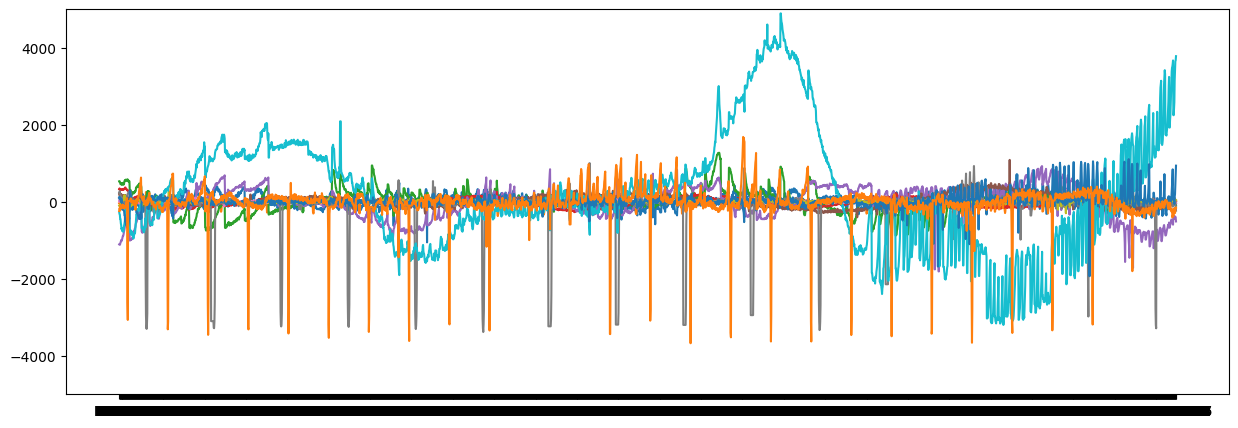

In [44]:
plt.figure(figsize=(15,5)) 
for i in range(12):
    plt.plot(exoplanets[i])
    plt.ylim([-5000,5000])
plt.show()

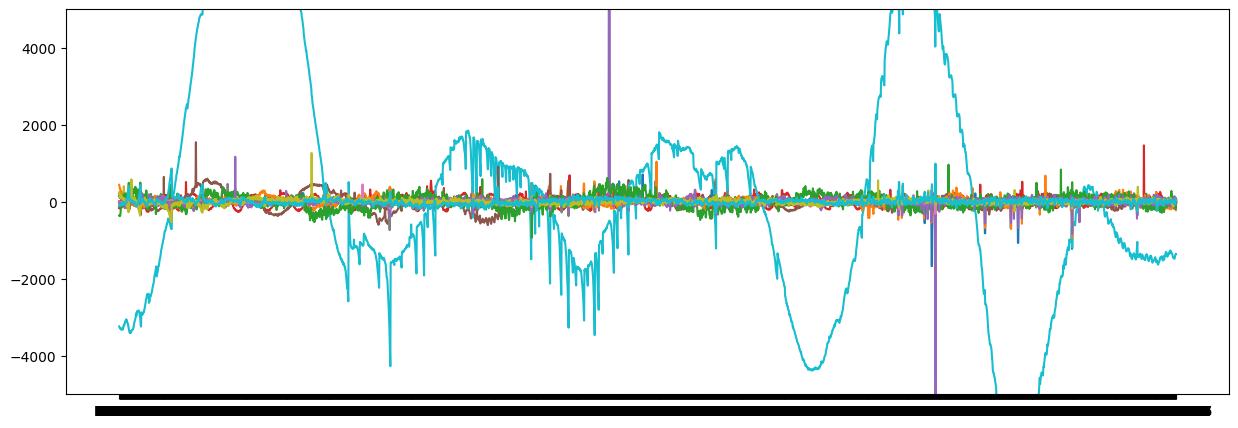

In [43]:
plt.figure(figsize=(15,5))  
for i in range(20):
    plt.subplot()
    plt.plot(no_exoplanets[i])
    plt.ylim([-5000,5000])
plt.show()

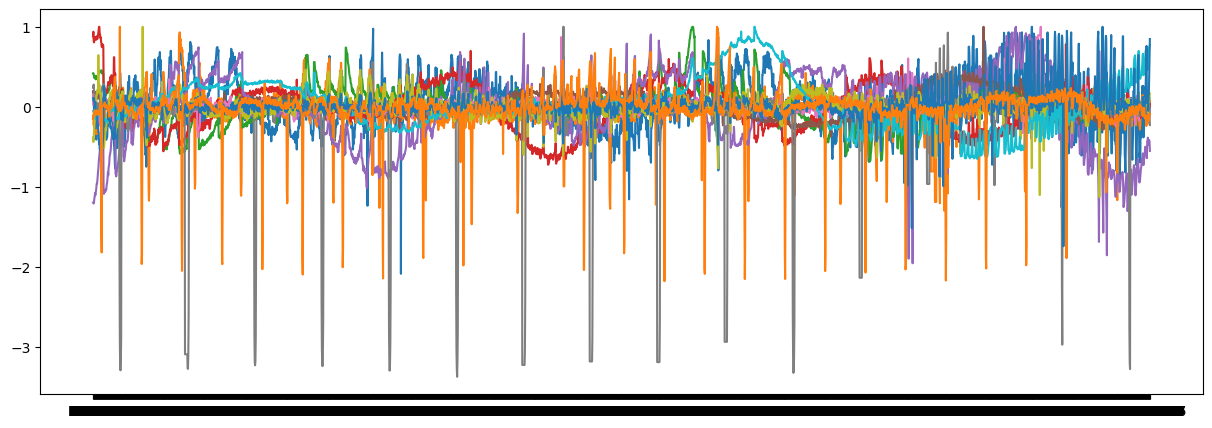

In [48]:
normalized_exo = []

for exo in exoplanets:
    normalized_exo.append(exo/np.max(exo))

plt.figure(figsize=(15,5))  
for i in range(12):
    plt.plot(normalized_exo[i])
plt.show()

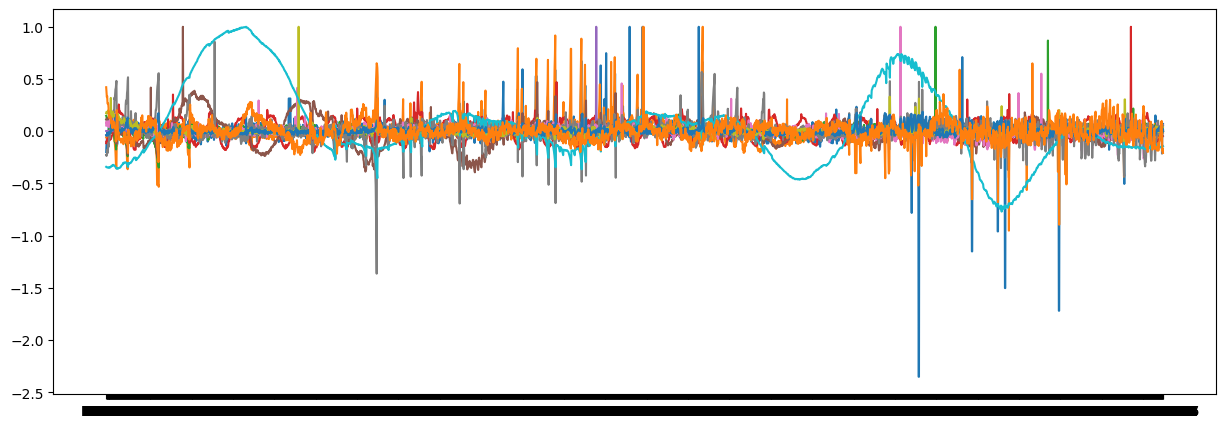

In [60]:
normalized_no_exo = []

for no_exo in no_exoplanets:
    normalized_no_exo.append(no_exo/np.max(no_exo))

plt.figure(figsize=(15,5))   
for i in range(12):
    plt.plot(normalized_no_exo[i])
plt.show()

In [71]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [65]:
val_df = pd.read_csv('./exoTest.csv')

In [67]:
train_X = train_df.drop('LABEL',axis = 1)
val_X = val_df.drop('LABEL',axis =1)
train_y = train_df['LABEL'].values
val_y = val_df['LABEL'].values


In [75]:
lr = LogisticRegression()
lr.fit(train_X,train_y)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_val_lr = lr.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print("\n")
print(classification_report(val_y, y_pred_val_lr))